https://woosa7.github.io/R-Classification-Decision-Tree/

In [7]:
library(party)
library(caret)

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich

Loading required package: ggplot2

Loading required package: lattice



In [8]:
idx <- sample(2, nrow(iris), replace = T, prob = c(0.6, 0.4))
table(idx)

idx
 1  2 
83 67 

In [9]:
train_1 <- iris[idx == 1, ]
test_1 <- iris[idx == 2, ]

# train data 이용한 모델링
tree_model <- ctree(Species ~ ., data = train_1)
tree_model


	 Conditional inference tree with 4 terminal nodes

Response:  Species 
Inputs:  Sepal.Length, Sepal.Width, Petal.Length, Petal.Width 
Number of observations:  83 

1) Petal.Length <= 1.6; criterion = 1, statistic = 78.713
  2)*  weights = 28 
1) Petal.Length > 1.6
  3) Petal.Width <= 1.7; criterion = 1, statistic = 40.293
    4) Petal.Length <= 4.6; criterion = 0.989, statistic = 8.979
      5)*  weights = 20 
    4) Petal.Length > 4.6
      6)*  weights = 9 
  3) Petal.Width > 1.7
    7)*  weights = 26 

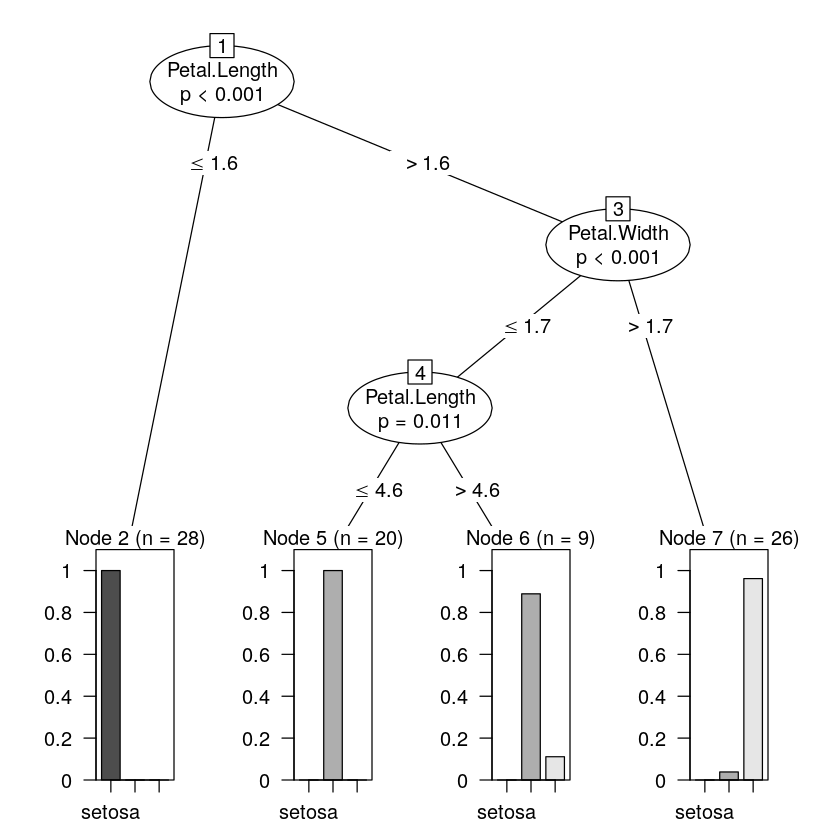

In [10]:
plot(tree_model)

### [연습문제]

In [52]:
df <- read.csv('csv/company_bankruptcy.csv')

In [53]:
dim(df)

[1] 6819   96

In [54]:
str(df)

'data.frame':	6819 obs. of  96 variables:
 $ Bankrupt.                                              : int  1 1 1 1 1 1 0 0 0 0 ...
 $ ROA.C..before.interest.and.depreciation.before.interest: num  0.371 0.464 0.426 0.4 0.465 ...
 $ ROA.A..before.interest.and...after.tax                 : num  0.424 0.538 0.499 0.451 0.538 ...
 $ ROA.B..before.interest.and.depreciation.after.tax      : num  0.406 0.517 0.472 0.458 0.522 ...
 $ Operating.Gross.Margin                                 : num  0.601 0.61 0.601 0.584 0.599 ...
 $ Realized.Sales.Gross.Margin                            : num  0.601 0.61 0.601 0.584 0.599 ...
 $ Operating.Profit.Rate                                  : num  0.999 0.999 0.999 0.999 0.999 ...
 $ Pre.tax.net.Interest.Rate                              : num  0.797 0.797 0.796 0.797 0.797 ...
 $ After.tax.net.Interest.Rate                            : num  0.809 0.809 0.808 0.809 0.809 ...
 $ Non.industry.income.and.expenditure.revenue            : num  0.303 0.304 0.30

In [55]:
colnames(df)[grep('ratio',colnames(df))]

[1] "Debt.ratio.."                        
[2] "Long.term.fund.suitability.ratio..A."

In [56]:
colnames(df)[grep('Ra',colnames(df))]

[1] "Operating.Profit.Rate"                             
 [2] "Pre.tax.net.Interest.Rate"                         
 [3] "After.tax.net.Interest.Rate"                       
 [4] "Operating.Expense.Rate"                            
 [5] "Realized.Sales.Gross.Profit.Growth.Rate"           
 [6] "Operating.Profit.Growth.Rate"                      
 [7] "After.tax.Net.Profit.Growth.Rate"                  
 [8] "Regular.Net.Profit.Growth.Rate"                    
 [9] "Continuous.Net.Profit.Growth.Rate"                 
[10] "Total.Asset.Growth.Rate"                           
[11] "Net.Value.Growth.Rate"                             
[12] "Total.Asset.Return.Growth.Rate.Ratio"              
[13] "Current.Ratio"                                     
[14] "Quick.Ratio"                                       
[15] "Interest.Expense.Ratio"                            
[16] "Inventory.Turnover.Rate..times."                   
[17] "Net.Worth.Turnover.Rate..times."                   
[18] "Current.Asset.Turnover.Rate"                       
[19] "Quick.Asset.Turnover.Rate"                         
[20] "Working.capitcal.Turnover.Rate"                    
[21] "Cash.Turnover.Rate"                                
[22] "Interest.Coverage.Ratio..Interest.expense.to.EBIT."

In [57]:
fivecols <- c('Interest.Coverage.Ratio..Interest.expense.to.EBIT.',
             'Interest.Expense.Ratio',
             'Interest.bearing.debt.interest.rate',
             'Working.capitcal.Turnover.Rate',
             'Total.Asset.Growth.Rate',
             'Bankrupt.')
df5 <- df[fivecols]

In [75]:
table(df5[['Bankrupt.']])/nrow(df5)


        0         1 
0.9677372 0.0322628 

In [68]:
set.seed(1)
idx <- sample(2, nrow(df5), replace = T, prob = c(0.7, 0.3))
table(idx)

idx
   1    2 
4725 2094 

In [69]:
train_1 <- df5[idx == 1, ]
test_1 <- df5[idx == 2, ]

# train data 이용한 모델링
tree_model <- ctree(Bankrupt. ~ ., data = train_1)
tree_model


	 Conditional inference tree with 7 terminal nodes

Response:  Bankrupt. 
Inputs:  Interest.Coverage.Ratio..Interest.expense.to.EBIT., Interest.Expense.Ratio, Interest.bearing.debt.interest.rate, Working.capitcal.Turnover.Rate, Total.Asset.Growth.Rate 
Number of observations:  4725 

1) Total.Asset.Growth.Rate <= 6.16e+09; criterion = 0.99, statistic = 9.53
  2) Total.Asset.Growth.Rate <= 1.32e+09; criterion = 1, statistic = 15.894
    3)*  weights = 937 
  2) Total.Asset.Growth.Rate > 1.32e+09
    4) Total.Asset.Growth.Rate <= 3.14e+09; criterion = 1, statistic = 45.103
      5)*  weights = 27 
    4) Total.Asset.Growth.Rate > 3.14e+09
      6) Total.Asset.Growth.Rate <= 5.26e+09; criterion = 0.99, statistic = 9.557
        7) Working.capitcal.Turnover.Rate <= 0.5938789; criterion = 1, statistic = 17.473
          8)*  weights = 37 
        7) Working.capitcal.Turnover.Rate > 0.5938789
          9) Interest.Expense.Ratio <= 0.6303369; criterion = 0.989, statistic = 9.421
            

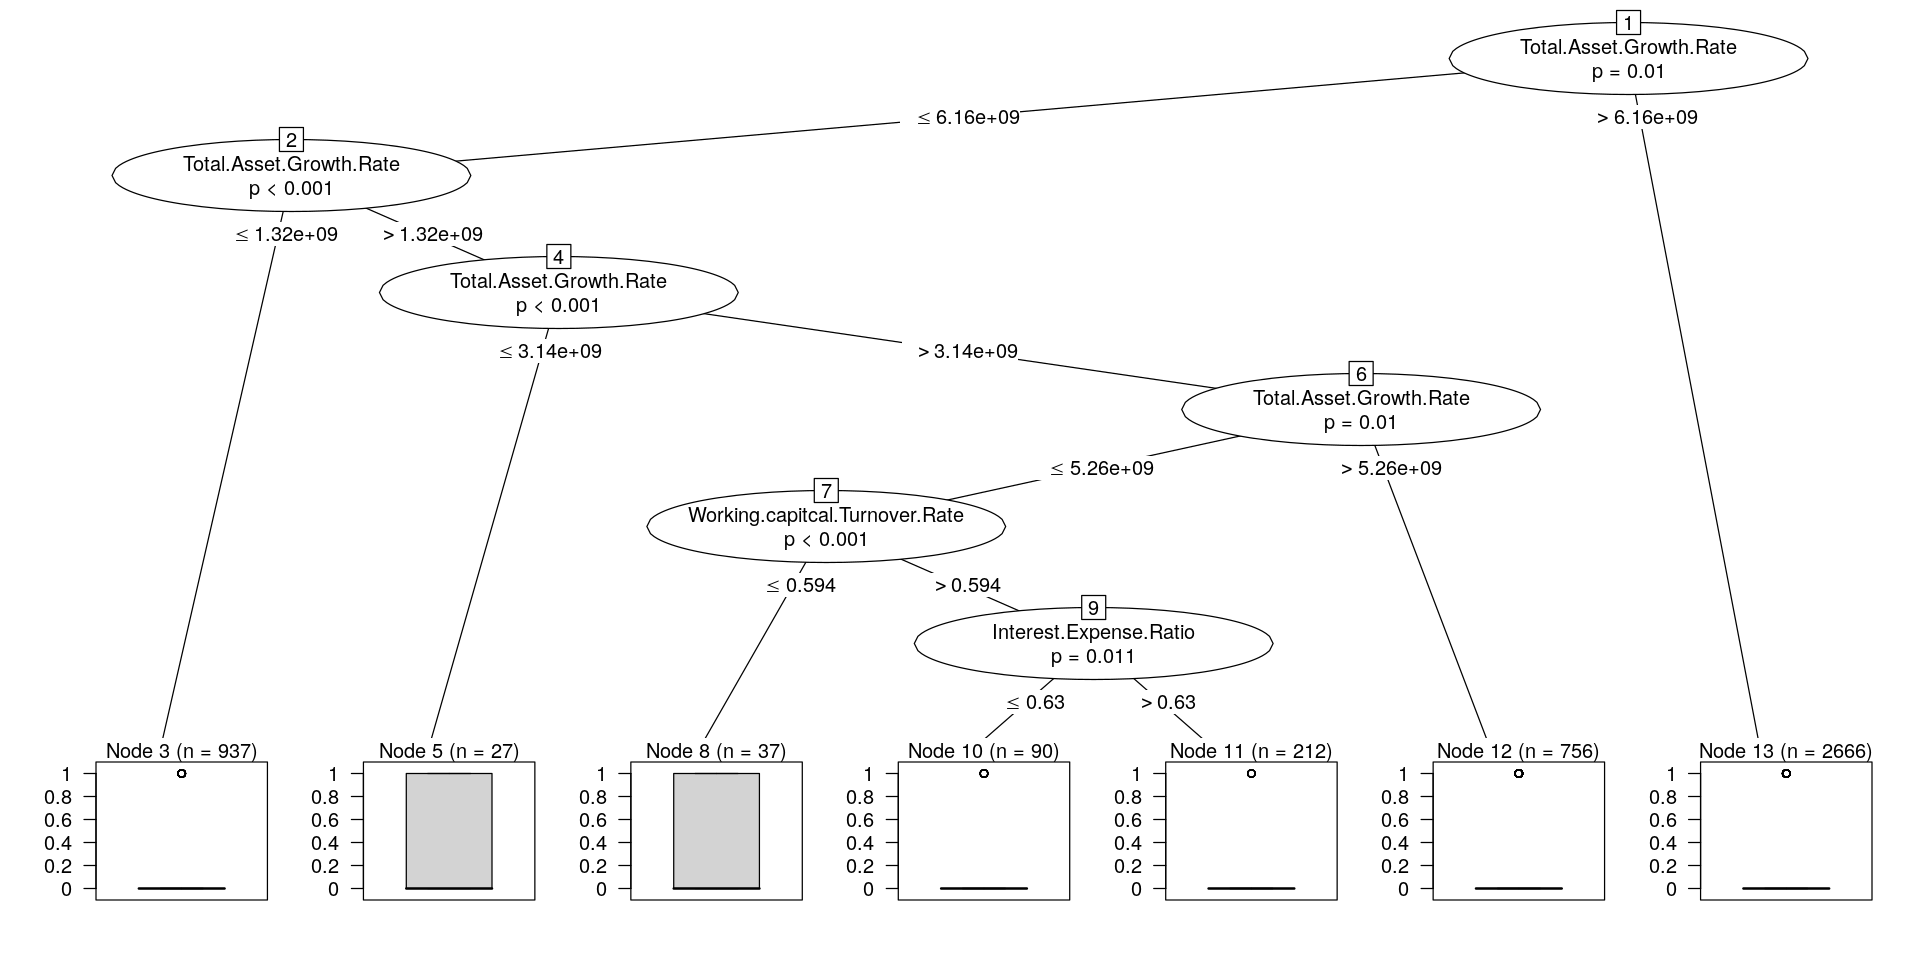

In [70]:
options(repr.plot.width=16, repr.plot.height=8)
plot(tree_model)

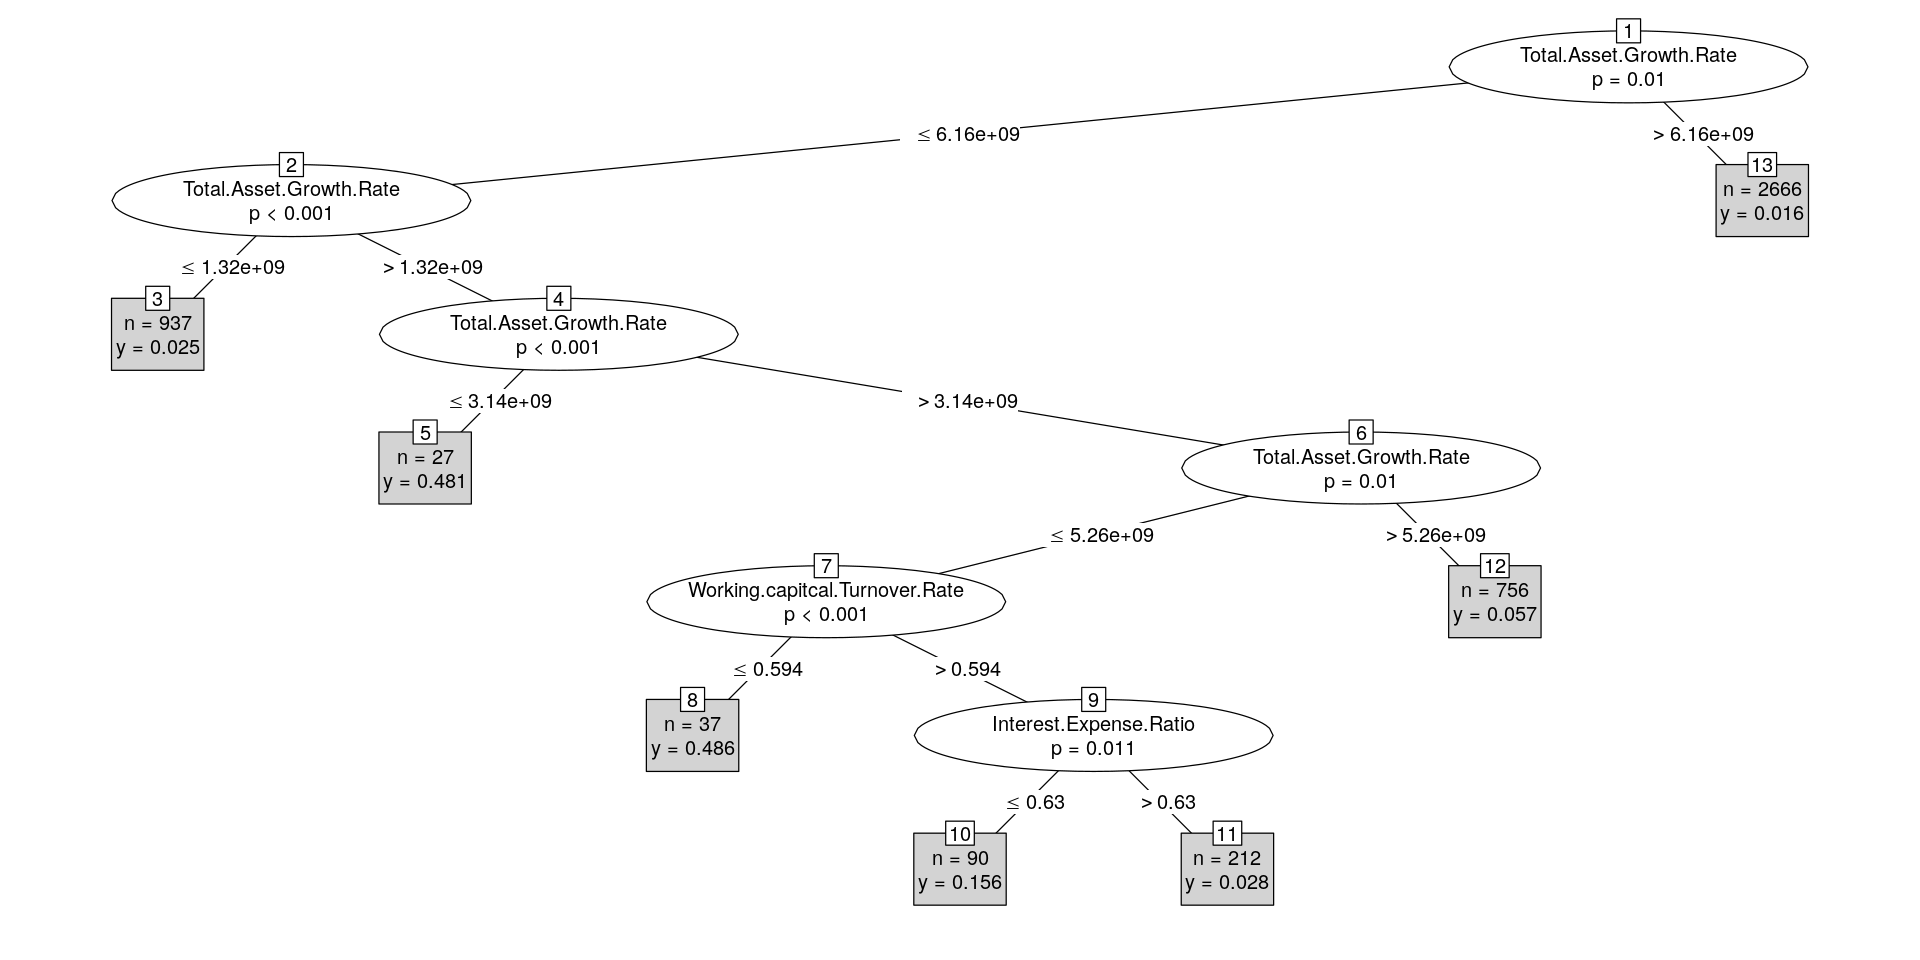

In [71]:
plot(tree_model, type = "simple")

In [72]:
pred<- as.factor(predict(tree_model)[,1]>0.2)
t <- as.factor(train_1$Bankrupt.)
levels(t) <- c(F,T)
confusionMatrix(pred, t)

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE  4532  129
     TRUE     33   31
                                          
               Accuracy : 0.9657          
                 95% CI : (0.9601, 0.9707)
    No Information Rate : 0.9661          
    P-Value [Acc > NIR] : 0.5844          
                                          
                  Kappa : 0.2625          
                                          
 Mcnemar's Test P-Value : 8.4e-14         
                                          
            Sensitivity : 0.9928          
            Specificity : 0.1938          
         Pos Pred Value : 0.9723          
         Neg Pred Value : 0.4844          
             Prevalence : 0.9661          
         Detection Rate : 0.9592          
   Detection Prevalence : 0.9865          
      Balanced Accuracy : 0.5933          
                                          
       'Positive' Class : FALSE           
                     

In [73]:
pred<- as.factor(predict(tree_model,newdata=test_1)[,1]>0.2)
t <- as.factor(test_1$Bankrupt.)
levels(t) <- c(F,T)
confusionMatrix(pred, t)

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE  2019   55
     TRUE     15    5
                                         
               Accuracy : 0.9666         
                 95% CI : (0.958, 0.9738)
    No Information Rate : 0.9713         
    P-Value [Acc > NIR] : 0.9129         
                                         
                  Kappa : 0.1123         
                                         
 Mcnemar's Test P-Value : 3.141e-06      
                                         
            Sensitivity : 0.99263        
            Specificity : 0.08333        
         Pos Pred Value : 0.97348        
         Neg Pred Value : 0.25000        
             Prevalence : 0.97135        
         Detection Rate : 0.96418        
   Detection Prevalence : 0.99045        
      Balanced Accuracy : 0.53798        
                                         
       'Positive' Class : FALSE          
                                         